In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%load_ext version_information
%version_information numpy, dlib, matplotlib, imageio, gaze, glob

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]
IPython 7.0.1
OS Darwin 18.0.0 x86_64 i386 64bit
numpy 1.15.2
dlib 19.16.0
matplotlib 3.0.0
imageio 2.4.1
gaze The 'gaze' distribution was not found and is required by the application
glob The 'glob' distribution was not found and is required by the application
Thu Oct 25 10:54:16 2018 CEST

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# detecting and cropping faces

In [4]:
import os
import glob


In [5]:
from gaze import init, Data
args = init(batch_size=8, no_cuda=True, verbose=1)
d = Data(args)

Found 2419 sample images;  1936  to train 483 to test


In [6]:
args

{'dataset_folder': 'dataset',
 'dataset_faces_folder': 'dataset_faces',
 'batch_size': 8,
 'test_batch_size': 1,
 'size_test_set': 0.2,
 'epochs': 40,
 'do_adam': False,
 'lr': 0.01,
 'momentum': 0.05,
 'no_cuda': True,
 'num_processes': 1,
 'seed': 42,
 'log_interval': 0,
 'fullsize': 75,
 'crop': 75,
 'size': 40,
 'mean': 0.4,
 'std': 0.3,
 'conv1_dim': 9,
 'conv1_kernel_size': 8,
 'conv2_dim': 36,
 'conv2_kernel_size': 12,
 'conv1_bn_momentum': 0.5,
 'conv2_bn_momentum': 0.5,
 'dense_bn_momentum': 0.5,
 'stride1': 2,
 'stride2': 4,
 'N_cv': 20,
 'dimension': 30,
 'verbose': 1}

In [7]:
n_show = 10
for target in d.classes:
    for filename in glob.glob(os.path.join(args.dataset_folder, target) + '/*.png')[-n_show:]:
        print(filename)

dataset/blink/2018-09-04_Laurent_180.png
dataset/blink/2018-10-03_Laurent_116.png
dataset/blink/2018-09-12_Laurent_020.png
dataset/blink/2018-10-12_Laurent_065.png
dataset/blink/2018-09-05_Laurent_085.png
dataset/blink/2018-10-14_Laurent_212.png
dataset/blink/2018-10-24_Laurent_026.png
dataset/blink/2018-09-14_Laurent_069.png
dataset/blink/2018-10-18_Laurent_123.png
dataset/blink/2018-10-18_Laurent_137.png
dataset/center/2018-10-24_Laurent_185.png
dataset/center/2018-10-24_Laurent_152.png
dataset/center/2018-09-12_Laurent_140.png
dataset/center/2018-09-14_Laurent_243.png
dataset/center/2018-09-12_Laurent_183.png
dataset/center/2018-09-04_Laurent_221.png
dataset/center/2018-09-04_Laurent_235.png
dataset/center/2018-10-14_Laurent_004.png
dataset/center/2018-10-03_Laurent_089.png
dataset/center/2018-10-03_Laurent_076.png
dataset/left/2018-10-12_Laurent_111.png
dataset/left/2018-10-12_Laurent_139.png
dataset/left/2018-10-14_Laurent_206.png
dataset/left/2018-10-15_Laurent_115.png
dataset/le

In [8]:
import imageio
import time
from gaze import FaceExtractor
FE = FaceExtractor()
timings = []
for target in d.classes:
    for filename in glob.glob(os.path.join(args.dataset_folder, target, '*.png')):
        filename_face = filename.replace(args.dataset_folder, args.dataset_faces_folder)
        if not os.path.exists(filename_face):
            print('Extracting face in ', filename_face)
            frame = imageio.imread(filename)
            t0 = time.time()
            t, b, l, r = FE.get_bbox(frame)
            face = FE.face_extractor(frame, bbox=(t, b, l, r))
            t1 = time.time()
            timings.append(t1-t0)
            if False:
                # Create figure and axes
                fig, ax = plt.subplots(figsize=(15, 8))

                # Display the image
                ax.imshow(frame)

                # Create a Rectangle patch
                from matplotlib import patches
                rect = patches.Rectangle((t, l), r-l, t-b, linewidth=1, edgecolor='r', facecolor='none')

                # Add the patch to the Axes
                ax.add_patch(rect)
                plt.show()
                
            if True:
                # Create figure and axes
                fig, ax = plt.subplots(figsize=(15, 8))

                # Display the cropped image
                ax.imshow(face)

                plt.show()                
            print('face.shape', face.shape)
            imageio.imwrite(filename_face, face) 


In [9]:
if len(timings)>0: 
    timings_ms = np.array(timings) * 1000
    print('timings in ms =', timings_ms.mean(), '+/-', timings_ms.std()) 

In [10]:
import os
fname = 'figures/dlib_timings'
if not os.path.exists(fname + '.pdf'):
    if len(timings)>0:
        fig, ax = plt.subplots(figsize=((8, 5)))
        n, bins, patches = ax.hist(timings_ms, bins=np.linspace(100, 200, 100), alpha=.4)
        ax.vlines(np.median(timings_ms), 0, n.max(), 'g', linestyles='dashed', label='median = %.3f ms' % np.median(timings))
        ax.set_xlabel('Timings (ms)')
        ax.set_ylabel('Smarts')
        ax.legend(loc='best')
        for ext in ['.pdf', '.png']:
            plt.savefig(fname + ext)        

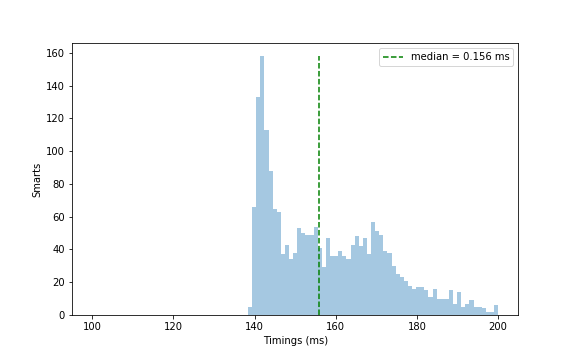

In [11]:
from IPython.display import Image
Image(filename=fname + '.png') 